
*   Student Name: Trinh Nguyen
*   Class/Section: INF 528, Spring Semester 2025
*   Student ID: TN623245
*   Date of Submission: 03/04/2025


5.1. Data summarization

Mean= 3.967820886826231
SD= 2.5896365946573545
Median= 3.5290118629995604
Skewness= 0.33718366106521463
Kurtosis= -1.0209969511042707


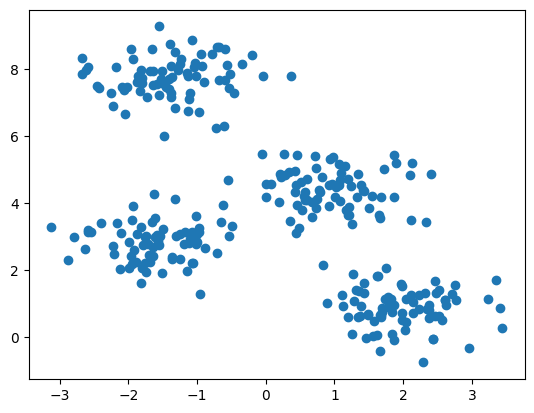

In [4]:
# descriptive statistics
import scipy as sp
import scipy.stats as stats
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

#Create a dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])
X_mean=np.mean(X[:,1])
print('Mean=',X_mean)

X_SD=np.std(X[:,1])
print('SD=',X_SD)

X_median=np.median(X[:,1])
print('Median=',X_median)

X_skewness=stats.skew(X[:,1])
print('Skewness=',X_skewness)

X_kurtosis=stats.kurtosis(X[:,1])
print('Kurtosis=',X_kurtosis)

5.2. Data Transformation

In [5]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1., 2.],
[ 2., 0., 0.],
[ 0., 1., -1.]])
print('Original Matrix:\n',X_train)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
print('Scaled Matrix:\n',X_train_minmax)

Original Matrix:
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
Scaled Matrix:
 [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


In [6]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1., 2.],
[ 2., 0., 0.],
[ 0., 1., -1.]])
X_scaled = preprocessing.scale(X_train)
X_scaled
#%%
#Scaled data has zero mean and unit variance:
X_scaled.mean(axis=0)
#%%
X_scaled.std(axis=0)

array([1., 1., 1.])

In [7]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 2., -2., 5.],
[ 4., 0., 0.],
[ 0., 2., -4.]])
print('Original Matrix:\n',X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
print('Scalar Mean:',scaler.mean_)
print('Scalar:',scaler.scale_)
X_train_scaled=scaler.transform(X_train)
print('Scaled Matrix:\n',X_train_scaled)

Original Matrix:
 [[ 2. -2.  5.]
 [ 4.  0.  0.]
 [ 0.  2. -4.]]
Scalar Mean: [2.         0.         0.33333333]
Scalar: [1.63299316 1.63299316 3.68178701]
Scaled Matrix:
 [[ 0.         -1.22474487  1.26750044]
 [ 1.22474487  0.         -0.09053575]
 [-1.22474487  1.22474487 -1.1769647 ]]


5.3. Data Normalization

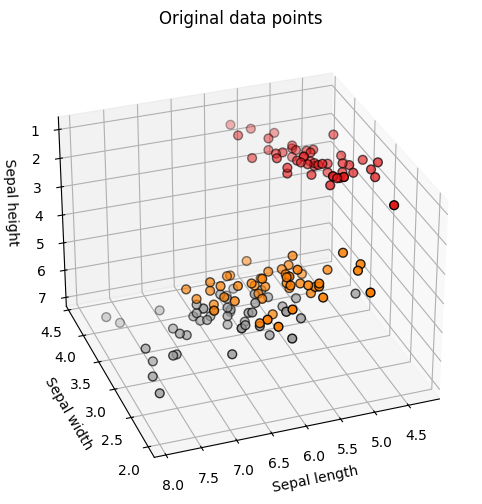

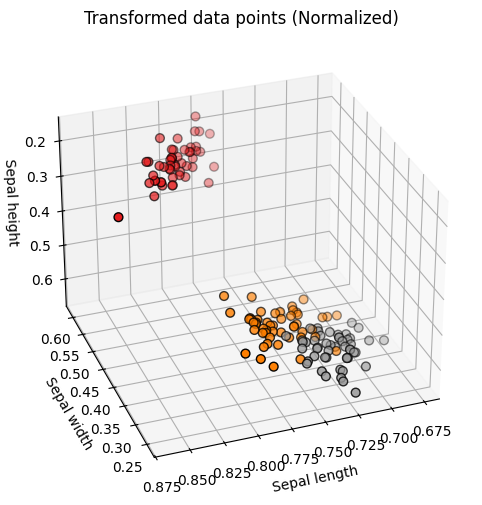

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

# Load dataset
iris = load_iris()
X, y = iris.data[:, :3], iris.target  # Take the first three features

# Plot the original data points
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title('Original data points')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Sepal height')

plt.show()

# Normalize the data
X_normalized = preprocessing.normalize(X, norm='l2')

# Plot the normalized data points
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)
ax.scatter(X_normalized[:, 0], X_normalized[:, 1], X_normalized[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title('Transformed data points (Normalized)')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Sepal height')

plt.show()


5.4. Dimension Reduction

Explained variance ratio (first two components): [0.92461872 0.05306648]


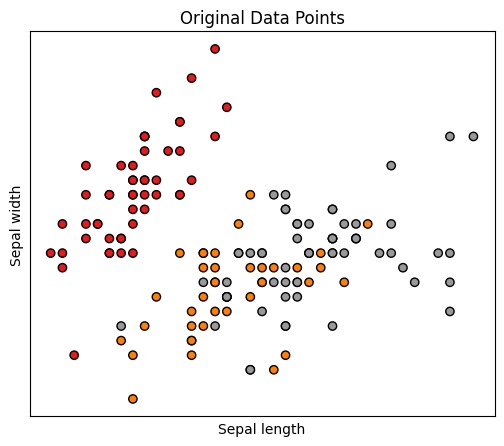

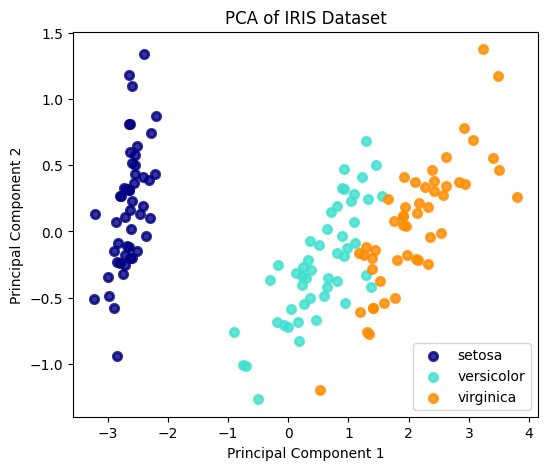

In [12]:
# =============================================================================
# Principal component analysis (PCA)
# =============================================================================
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Percentage of variance explained for each component
print("Explained variance ratio (first two components):", pca.explained_variance_ratio_)

# =============================================================================
# 2D Presentation of Original Data
# =============================================================================
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Original Data Points")
plt.xticks(())
plt.yticks(())
plt.show()

# =============================================================================
# 2D Presentation of PCA Transformed Data
# =============================================================================
plt.figure(figsize=(6, 5))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


5.5. Feature Selection

In [13]:
# =============================================================================
# Univariate feature selection
# =============================================================================
"""
Created on Sat Sep 14 23:20:26 2019
@author: asubasi
"""
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
X, y = iris.data, iris.target
print(X)
X.shape
#%%
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print(X_new)
X_new.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

(150, 2)

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Data Summarization
def summarize_data(X):
    print("\nData Summary:")
    print(X.describe())
    print("\nMissing Values:")
    print(X.isnull().sum())

summarize_data(X)

# Define a Data Processing Pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('feature_scaling', MinMaxScaler()),  # Apply Min-Max Scaling
    ('power_transform', PowerTransformer(method='yeo-johnson')),  # Normalize data
    ('dim_reduction', PCA(n_components=5))  # Reduce to 5 principal components
])

# Apply the pipeline
X_transformed = pipeline.fit_transform(X)

# Display transformed data shape
print("\nTransformed Data Shape:", X_transformed.shape)

# Convert transformed data into a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=[f'PC{i+1}' for i in range(X_transformed.shape[1])])
print("\nFirst 5 rows of Transformed Data:")
print(X_transformed_df.head())



Data Summary:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.0000

we need Feature Selection to:

Removes irrelevant or redundant features to improve model performance.
Reduces overfitting by focusing only on the most important features.
Speeds up training by reducing the number of computations.


Data Transformation to:

Ensures that all features are on the same scale (e.g., using MinMaxScaler or StandardScaler).
Makes the data distribution more Gaussian-like, which can benefit models that assume normality.
Helps improve model accuracy and stability.


Dimensionality Reduction to:

Reduces the number of features while retaining most of the variance in the dataset (e.g., PCA).
Helps with visualization by reducing high-dimensional data to 2D or 3D.
Reduces noise in the data, making the model more generalizable.


